---
title: Kane's method
---

![pendulum](/figures/dynamics/pendulum.png)


## Frames
Frame A

$$ {}^{N}{}{\vec{\omega}}^{A}{} = \dot{\theta} \hat{n}_z= \dot{\theta} \hat{a}_z $$


## Velocity

if point $p$'s position is represented by $\vec{r}$ where

$$
\vec{r} = -l\hat{a}_y
$$
then from the example in the derivatives module, we know that 
$$
\vec{v} = \frac{ {}^{N}{}{ d\vec{r}}{}{}}{dt}= l\dot{\theta}\hat{a}_x
$$

and 
$$
\vec{a} = l\ddot{\theta}\hat{a}_x  + l\dot{\theta}^2\hat{a}_y
$$

## Speed Variables

In this system our speed variable is $\dot{\theta}$

## Forces

There are a number of forces acting within the system

* Two tension forces, one at point $p$ one at point $o$.  These may be considered internal forces if modeled correctly
* One gravity force acting on point $p$

Partial Velocities

* partial velocity of particle
* $v_{p1} = v$
* partial velocity of f1, f2,f3
* $v_{f1} = 0$
* $v_{f2} = v$
* $v_{f3} = v$

Generalized effective force of a particle
$$
 {}^{N}{}{F}{Q}{u_r} = \frac{\partial{^N\vec{v}^Q}}{\partial u_r} \cdot  \left(m^Q*  {}^{N}{}{\vec{a}}^{Q}{}\right)
$$

Kane's Equation for a system of particles and masses for speed variable $u_r$, $m$ forces, $n$ moments, $o$ particles, and $p$ bodies
$$
\sum_{i=1}^{m}{\vec{f}_i} \cdot \frac{\partial\vec{v}_{\vec{f}_i}}{\partial u_r} + \sum_{j=1}^{n}{\vec{\tau}_j} \cdot \frac{\partial\vec{\omega}_{\vec{\tau}_j}}{\partial u_r} = \sum_{k=1}^{o}\frac{\partial\vec{v}_{k}}{ \partial u_r} \cdot m_{k}\vec{a}_{k} +    \sum_{l=1}^{p}\left( \frac{\partial\vec{v}_{l}}{\partial u_r} \cdot m_{l}\vec{a}_{l} +
\frac{\partial\vec{\omega}_{l}}{\partial u_r} \cdot \left( \overrightarrow{I}_{l}\cdot\vec{\alpha}_l
+ \vec{\omega}_l \times \overrightarrow{I}_{l}\cdot\vec{\omega}_l
\right) \right)
$$

## Example 1

This example uses $\vec{r}=l\hat{a}_y$ as the position vector for describing particle p's position

In [1]:
%matplotlib inline

In [2]:
# -*- coding: utf-8 -*-
"""
Written by Daniel M. Aukes
Email: danaukes<at>gmail.com
Please see LICENSE for full license.
"""

import pynamics
from pynamics.frame import Frame
from pynamics.variable_types import Differentiable,Constant,Variable
from pynamics.system import System
from pynamics.body import Body
from pynamics.dyadic import Dyadic
from pynamics.output import Output,PointsOutput
from pynamics.particle import Particle
from pynamics.constraint import AccelerationConstraint

import pynamics.integration
import sympy
import numpy
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "html5"
plt.ion()
from math import pi
from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
system = System()
pynamics.set_system(__name__,system)

In [4]:
lA = Constant(1,'lA',system)
mA = Constant(1,'mA',system)
g = Constant(9.81,'g',system)

In [5]:
qA,qA_d,qA_dd = Differentiable('qA',system)

In [6]:
initialvalues = {}
initialvalues[qA]=0*pi/180
initialvalues[qA_d]=0*pi/180
ini = [initialvalues[item] for item in system.get_state_variables()]

In [7]:
N = Frame('N')
A = Frame('A')

system.set_newtonian(N)
A.rotate_fixed_axis(N,[0,0,1],qA,system)

In [8]:
pO = 0*N.x
pNA=lA*A.x

In [9]:
ParticleA = Particle(pNA,mA,'ParticleA',system)

In [10]:
system.addforcegravity(-g*N.y)

In [11]:
f,ma = system.getdynamics()

2021-07-22 15:55:37,474 - pynamics.system - INFO - getting dynamic equations


In [12]:
f

[-g⋅lA⋅mA⋅cos(qA)]

In [13]:
ma

⎡  2         ⎤
⎣lA ⋅mA⋅qA_dd⎦

In [14]:
func = system.state_space_post_invert(f,ma)

2021-07-22 15:55:37,740 - pynamics.system - INFO - solving a = f/m and creating function
2021-07-22 15:55:37,748 - pynamics.system - INFO - substituting constrained in Ma-f.
2021-07-22 15:55:37,826 - pynamics.system - INFO - done solving a = f/m and creating function


In [15]:
tinitial = 0
tfinal = 5
fps = 30
t = numpy.r_[tinitial:tfinal:1/fps]
tol=1e-12

In [16]:
states=pynamics.integration.integrate(func,ini,t,rtol=tol,atol=tol,args=({'constants':system.constant_values},))

2021-07-22 15:55:37,965 - pynamics.integration - INFO - beginning integration
2021-07-22 15:55:37,965 - pynamics.system - INFO - integration at time 0000.00
2021-07-22 15:55:38,040 - pynamics.integration - INFO - finished integration


2021-07-22 15:55:42,177 - pynamics.output - INFO - calculating outputs
2021-07-22 15:55:42,185 - pynamics.output - INFO - done calculating outputs


<AxesSubplot:>

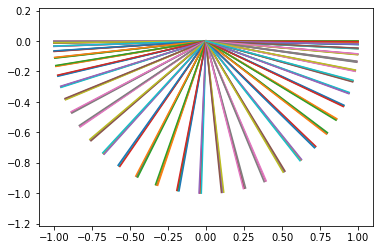

In [18]:
points = [pO,pNA]
points_output = PointsOutput(points,system)
points_output.calc(states,t)
points_output.plot_time()
#points_output.animate(fps = fps,lw=2)

In [19]:
del A,N,ParticleA,system, qA,qA_d,qA_dd,ini,states,t,tfinal,tinitial,tol
del pO,pNA
del lA,g,mA
del f,ma
del points

## Example 2
This example uses $\vec{r}= x\hat{n}_x + y\hat{n}_y$ as the position vector for p.  This requires an added constraint to maintain the length of r, as in $|\vec{r}|=l_A$

In [20]:
system = System()
pynamics.set_system(__name__,system)

In [21]:
lA = Constant(1,'lA',system)
mA = Constant(1,'mA',system)
g = Constant(9.81,'g',system)

In [22]:
x,x_d,x_dd = Differentiable('x',system)
y,y_d,y_dd = Differentiable('y',system)

In [23]:
initialvalues = {}
initialvalues[x]=1
initialvalues[x_d]=0
initialvalues[y]=0
initialvalues[y_d]=0
ini = [initialvalues[item] for item in system.get_state_variables()]

In [24]:
N = Frame('N')

system.set_newtonian(N)

In [25]:
pO = 0*N.x
pNA=x*N.x+y*N.y

In [26]:
ParticleA = Particle(pNA,mA,'ParticleA',system)

In [27]:
system.addforcegravity(-g*N.y)

In [28]:
eq = []
eq.append(pNA)
eq_d=[item.time_derivative() for item in eq]
eq_dd=[item.time_derivative() for item in eq_d]
eq_dd_scalar = [eq_dd[0].length()]
constraint = AccelerationConstraint(eq_dd_scalar)
system.add_constraint(constraint)

In [29]:
f,ma = system.getdynamics()

2021-07-22 15:55:59,515 - pynamics.system - INFO - getting dynamic equations


In [30]:
func = system.state_space_post_invert(f,ma,constants=system.constant_values)

2021-07-22 15:56:06,499 - pynamics.system - INFO - solving a = f/m and creating function
2021-07-22 15:56:06,510 - pynamics.system - INFO - substituting constrained in Ma-f.
2021-07-22 15:56:06,548 - pynamics.system - INFO - done solving a = f/m and creating function


In [31]:
tinitial = 0
tfinal = 5
fps = 30
t = numpy.r_[tinitial:tfinal:1/fps]
tol=1e-12

In [33]:
func(ini,0,)

2021-07-22 15:56:32,054 - pynamics.system - INFO - integration at time 0000.00


TypeError: can't convert expression to float

In [ ]:
states=pynamics.integration.integrate(func,ini,t,rtol=tol,atol=tol)

In [ ]:
points = [pO,pNA]
points_output2 = PointsOutput(points,system)
points_output2.calc(states,t)
points_output2.animate(fps = fps,lw=2)

In [ ]:
HTML(points_output.anim.to_html5_video())

In [ ]:
HTML(points_output2.anim.to_html5_video())

In [ ]:
system.constant_values
